In [44]:
from __future__ import print_function
import numpy as np
import realization as rn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
#kout, stats, hists = rn.ng.driver(dims=(1024,1024), fNL=1, Pk=-1, eq_vol=True, ng_pow=-1, fG=0.0)

def trans(g):
#    h = 1./(10.+g)
    h = np.exp(g)
    return h-np.mean(h)

nMC = 20
stats_all = []
for _ in range(nMC):
    kout, stats, hists = rn.ng.driver(dims=(512, 512, 512), fNL=1, Pk=-0.5, eq_vol=False, transform=trans)
    stats_all.append(stats)

stats_all = np.array(stats_all)
stats_mean = stats_all.mean(axis=0)
stats_std = stats_all.std(axis=0) if nMC>1 else None

In [ ]:
stats_all = np.array(stats_all)
stats_mean = stats_all.mean(axis=0)
stats_std = stats_all.std(axis=0)

In [ ]:
plt.figure()
i1 = 1

if not stats_std:
    plt.plot(kout[i1:], stats_mean.T[3][i1:], '+', label='kurtosis');
    plt.plot(kout[i1:], stats_mean.T[2][i1:], 'o', label='skewness');
    plt.plot(kout[i1:], stats_mean.T[1][i1:]-1, '*', label='variance-1');
    plt.plot(kout[i1:], stats_mean.T[0][i1:], '.', label='mean');
else:
    plt.errorbar(kout[i1:]-0.005, stats_mean.T[3][i1:],   yerr=stats_std.T[3][i1:], fmt='+', label='kurtosis');
    plt.errorbar(kout[i1:]+0.000, stats_mean.T[2][i1:],   yerr=stats_std.T[2][i1:], fmt='o', label='skewness');
    plt.errorbar(kout[i1:]+0.005, stats_mean.T[1][i1:]-1, yerr=stats_std.T[1][i1:], fmt='*', label='var-1');
    plt.errorbar(kout[i1:]+0.010, stats_mean.T[0][i1:],   yerr=stats_std.T[0][i1:], fmt='.', label='mean');

    plt.axhline(y=0, color='k')

plt.legend()


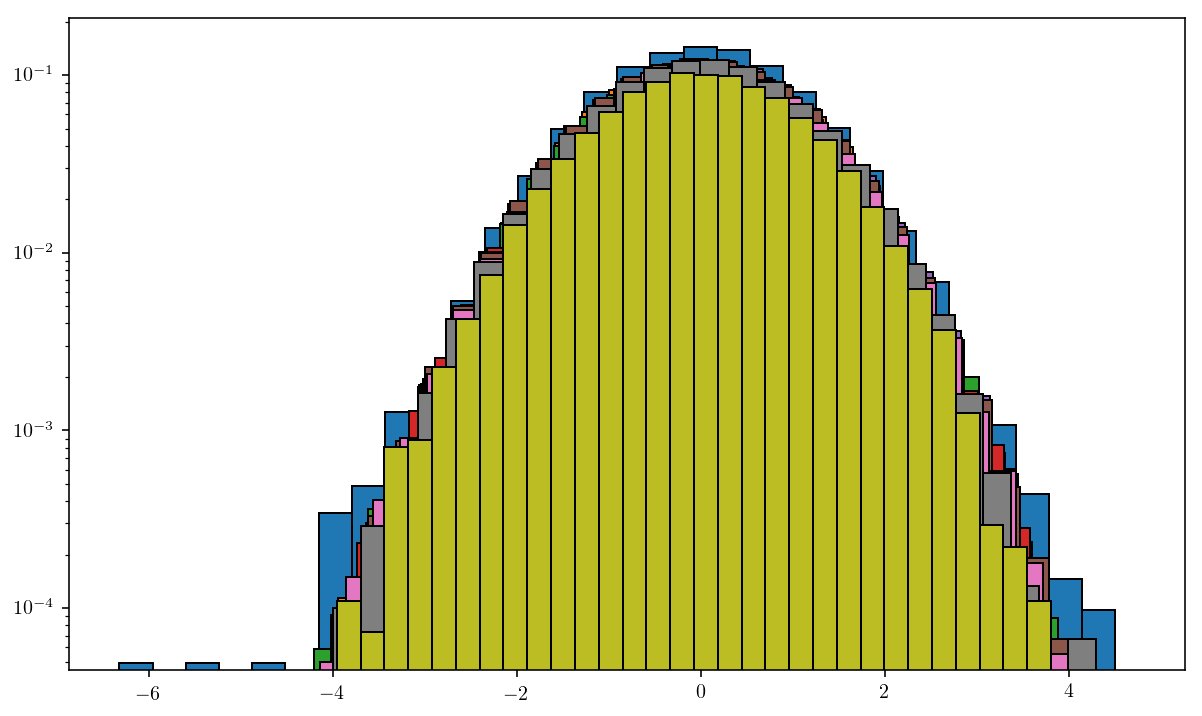

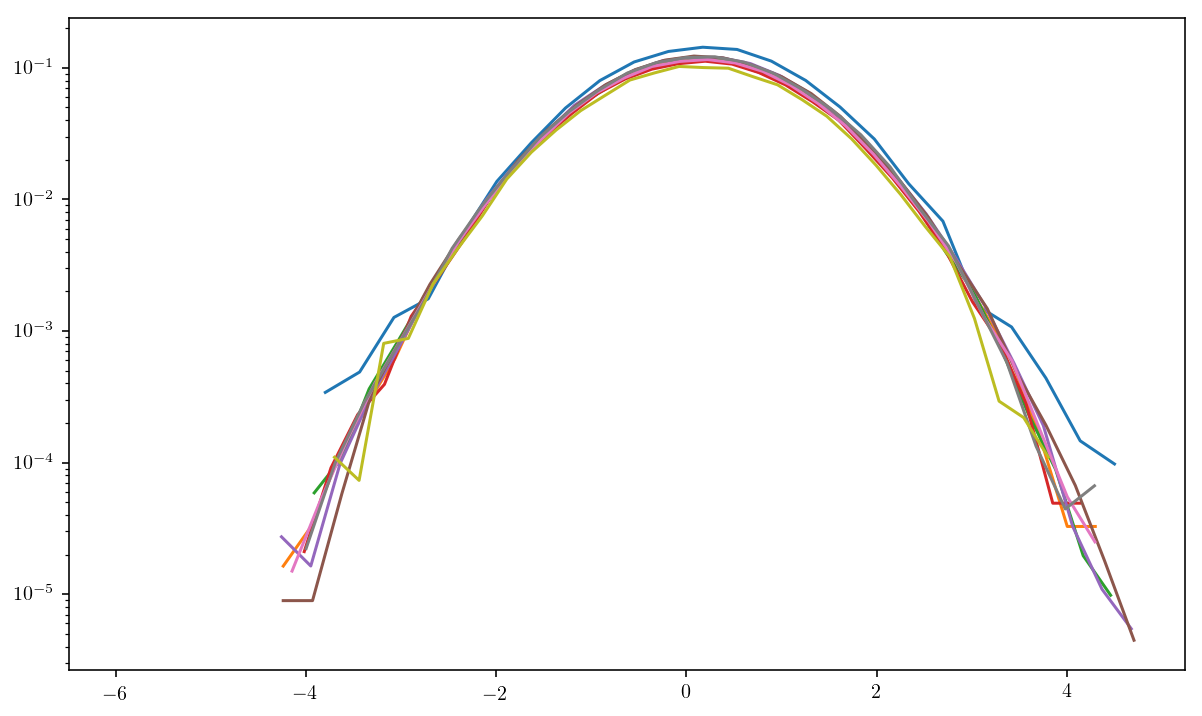

In [38]:
## see http://stackoverflow.com/questions/44003552/matplotlib-histogram-from-numpy-histogram-output
for frq, edges in hists[0:]:
    frq = np.array(frq,dtype=np.float)
    frq /= frq.sum()
    plt.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge", log=True)
    # plt.figure()
    
plt.figure()
for frq, edges in hists[0:]:
    frq = np.array(frq,dtype=np.float)
    frq /= frq.sum()
    ctrs = edges[:-1] + np.diff(edges)
    plt.semilogy(ctrs, frq)
    # plt.figure()

In [5]:
rlzn_fourier0, rlzn_config0 = rn.ng.local_fNL((4096,4096), 1, -2, return_config=True, ng_pow=-1, fG=0)
rlzn_fourier100, rlzn_config100 = rn.ng.local_fNL((4096,4096), 1, -2, return_config=True, ng_pow=2)

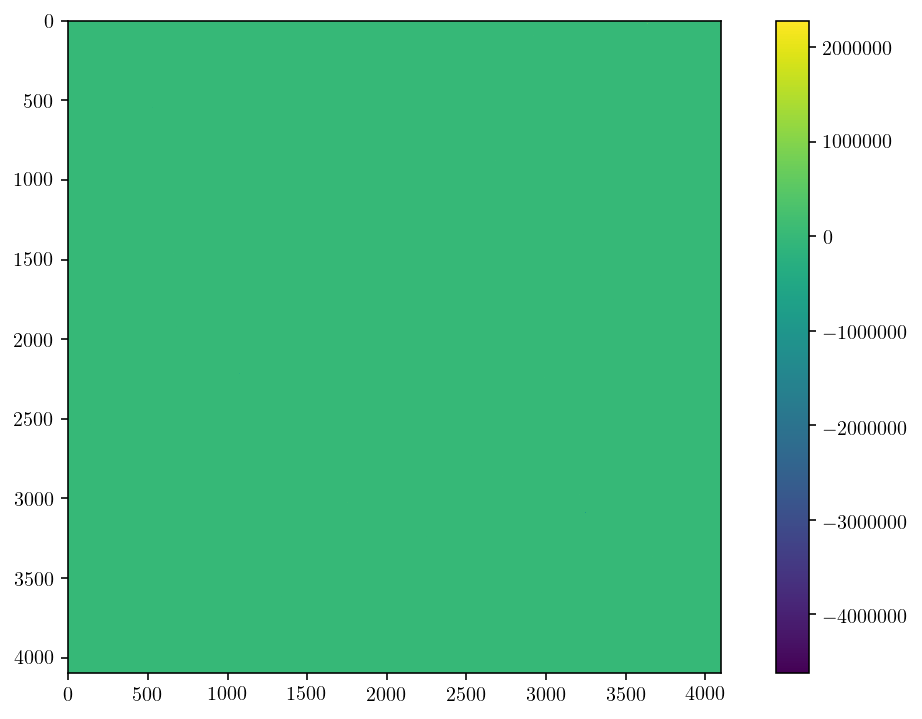

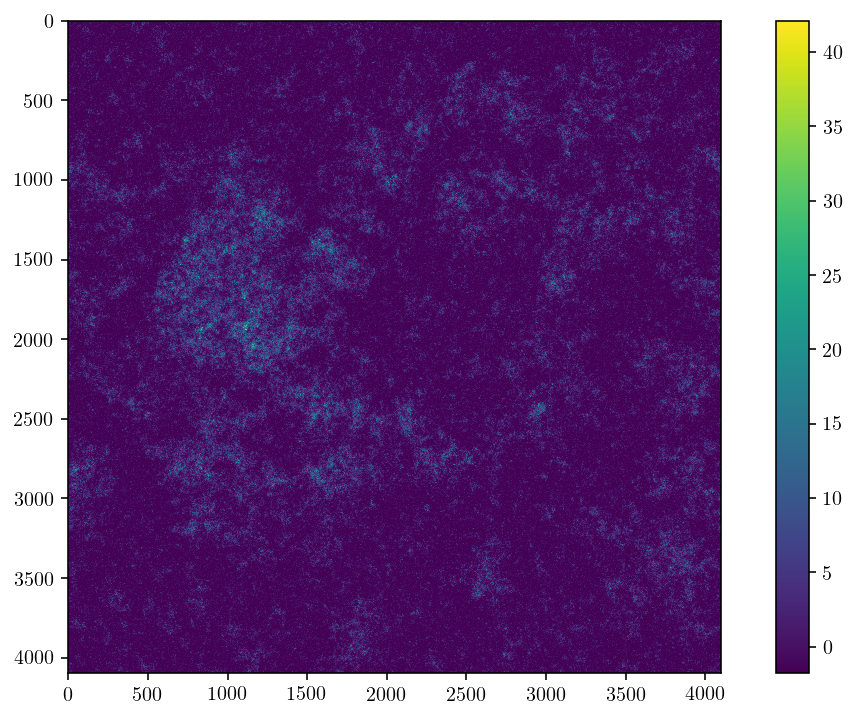

In [6]:
plt.imshow(rlzn_config0); plt.axis("scaled"); plt.colorbar()
plt.figure()
plt.imshow(rlzn_config100); plt.axis("scaled"); plt.colorbar()

(-0.5, 2048.5, -0.5, 2047.5)

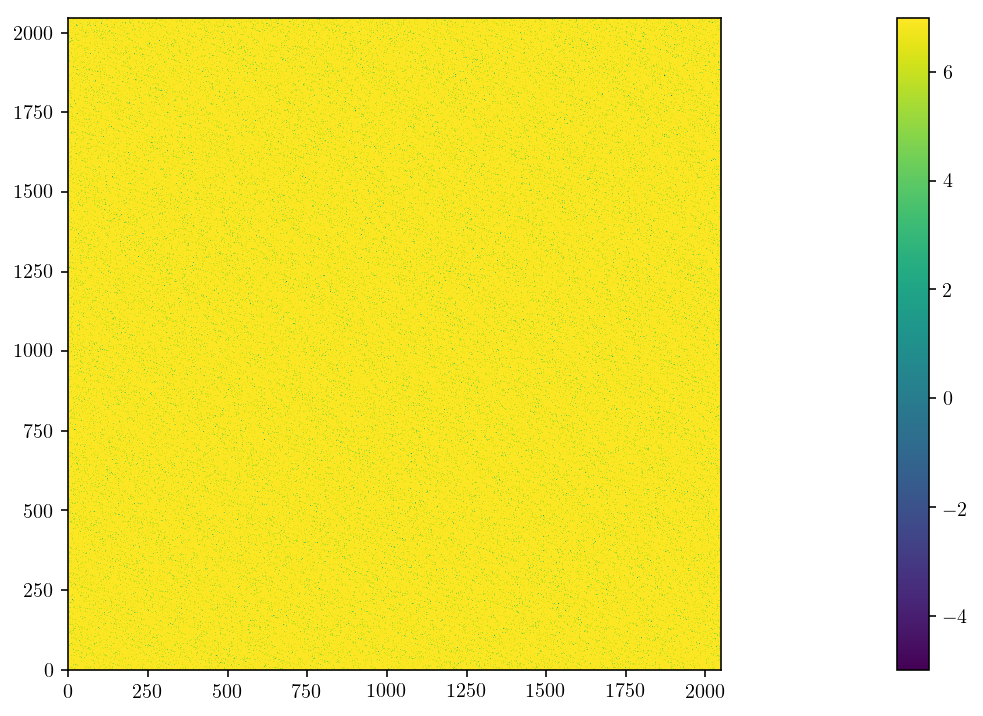

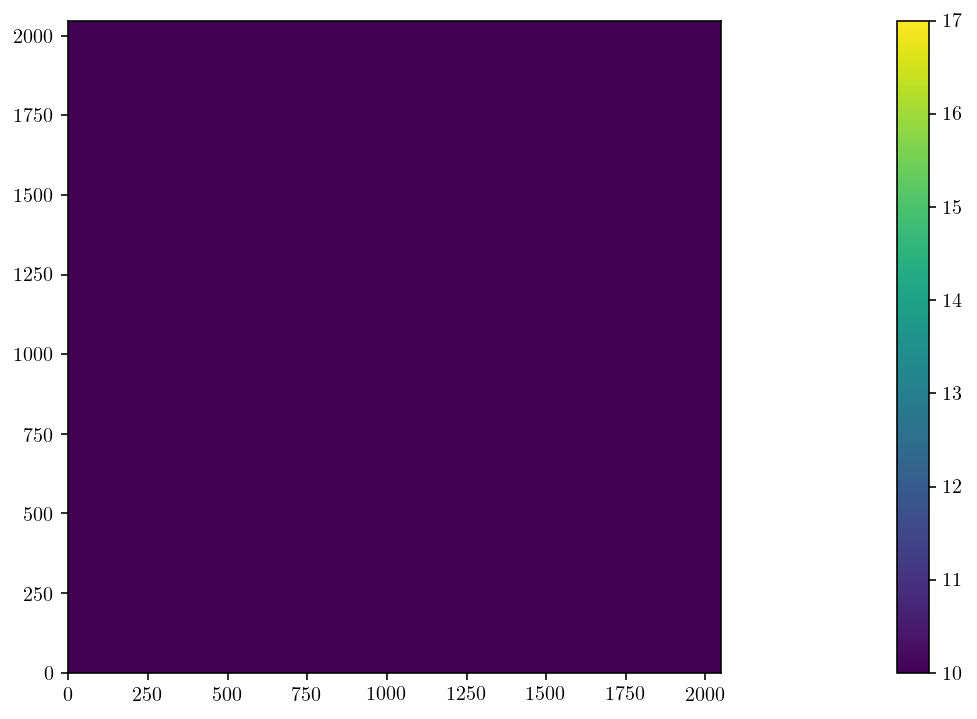

In [7]:
plt.imshow(np.log(np.abs(rlzn_fourier0[:rlzn_fourier0.shape[0]/2])/4096),vmin=-5,vmax=7, origin='lower'); plt.colorbar(); plt.axis("scaled")
plt.figure()
plt.imshow(np.log(np.abs(rlzn_fourier100[:rlzn_fourier100.shape[0]/2])/4096), vmin=10,vmax=17, origin='lower'); plt.colorbar(); plt.axis("scaled")

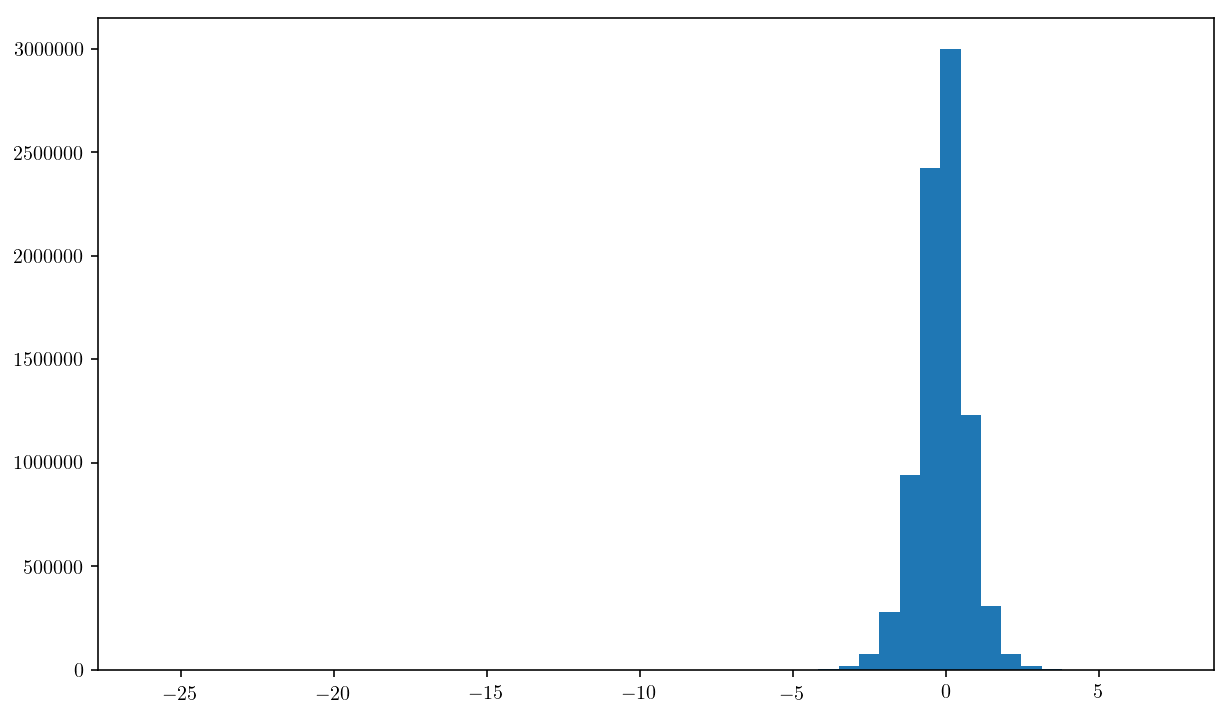

In [8]:
_=plt.hist(np.log(np.abs(rlzn_fourier100)/4096).ravel(), bins=50)

In [9]:
plt.imshow?

In [10]:
rlzn_fourier0[:rlzn_fourier.shape[0]/2].shape

NameError: name 'rlzn_fourier' is not defined

In [12]:
q(3)

NameError: name 'q' is not defined